In [1]:
options(warn = -1)
options(repr.plot.width=6, repr.plot.height=4) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
library(stringr)
library(dplyr)
library(plotrix)
par(family ="AppleGothic",bg='white')

#test의 자료구조 확인하기
checkData <- function(data){
    cat("<<----------data 구조---------->>\n");
    str(data);
    cat("<<----------data HEAD---------->>\n");
    print(head(data));
    cat("<<----------data TAIL---------->>\n");
    print(tail(data))
    cat("<<----------data Summary---------->>\n");
    # test 의 기본 통계량 보기
    summary(data)
    
}

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
election<- read.csv("../Data/election_2022.csv")
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


In [3]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [5]:
length(unique(election$`시군구`)) # 시군구는 중복된게 많다.. 중구 가 엄청 많다. 
# 세명만 투표한사람이 몇명일까? Election sum col 만들기 
# electionSum = 이재명 + 윤석열 + 심상정
#election$electionSum <- election$`이재명`+election$`윤석열`+election$`심상정`
election$electionSum <- apply(election[,5:7],1,sum) # apply 사용!
head(election)

[1] 226

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417
2,서울특별시,중구,111448,84998,38244,42906,2310,83460
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [6]:
# electionSum에 투표수의 몇 percent?
# electionRatio 
election$electionRatio <- election$electionSum/election$`투표수`*100

head(election)
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
243,경상남도,함양군,34459,26955,8526,16957,528,26011,96.49787
244,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12198
245,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89123
246,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46306
247,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.62824
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591,109956,97.45885


In [7]:
# election  ratio 가 가장 높은 시군구와 가장 낮은 시군구?
# 1) 정렬 
arrange(election, desc(election$electionRatio))[c(1,nrow(election)),]

# 2) subset
subset(election, electionRatio ==max(election$electionRatio))
subset(election, electionRatio ==min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [8]:
# csv 로 저장하기 : filename ->election_2022_job.csv 
save(election,file ="../Data/election_2022_job.csv")

saveCSV <- function(data,filePath){
    #save(data,filePath)
    write.csv(data,filePath, row.names =F)
}


In [9]:
write.csv(election, "../Data/election_2022_job.csv", row.names = F)

In [10]:
#read.csv("../Data/election_2022_job.csv")
# 실제 선거에서는 가상데이터로 소스를 미리 만들어놓고 사용하는것 개표 2시 신문 4시인데 언제 분석하고잇나?

# 광역시도별 투표율을 3D pieChart로 표현하기


[1] 33764664

,광역시도,투표율
,<chr>,<dbl>
1,경기도,25.23
2,서울특별시,19.26
3,부산광역시,6.52
4,경상남도,6.36
5,인천광역시,5.58
6,경상북도,5.25


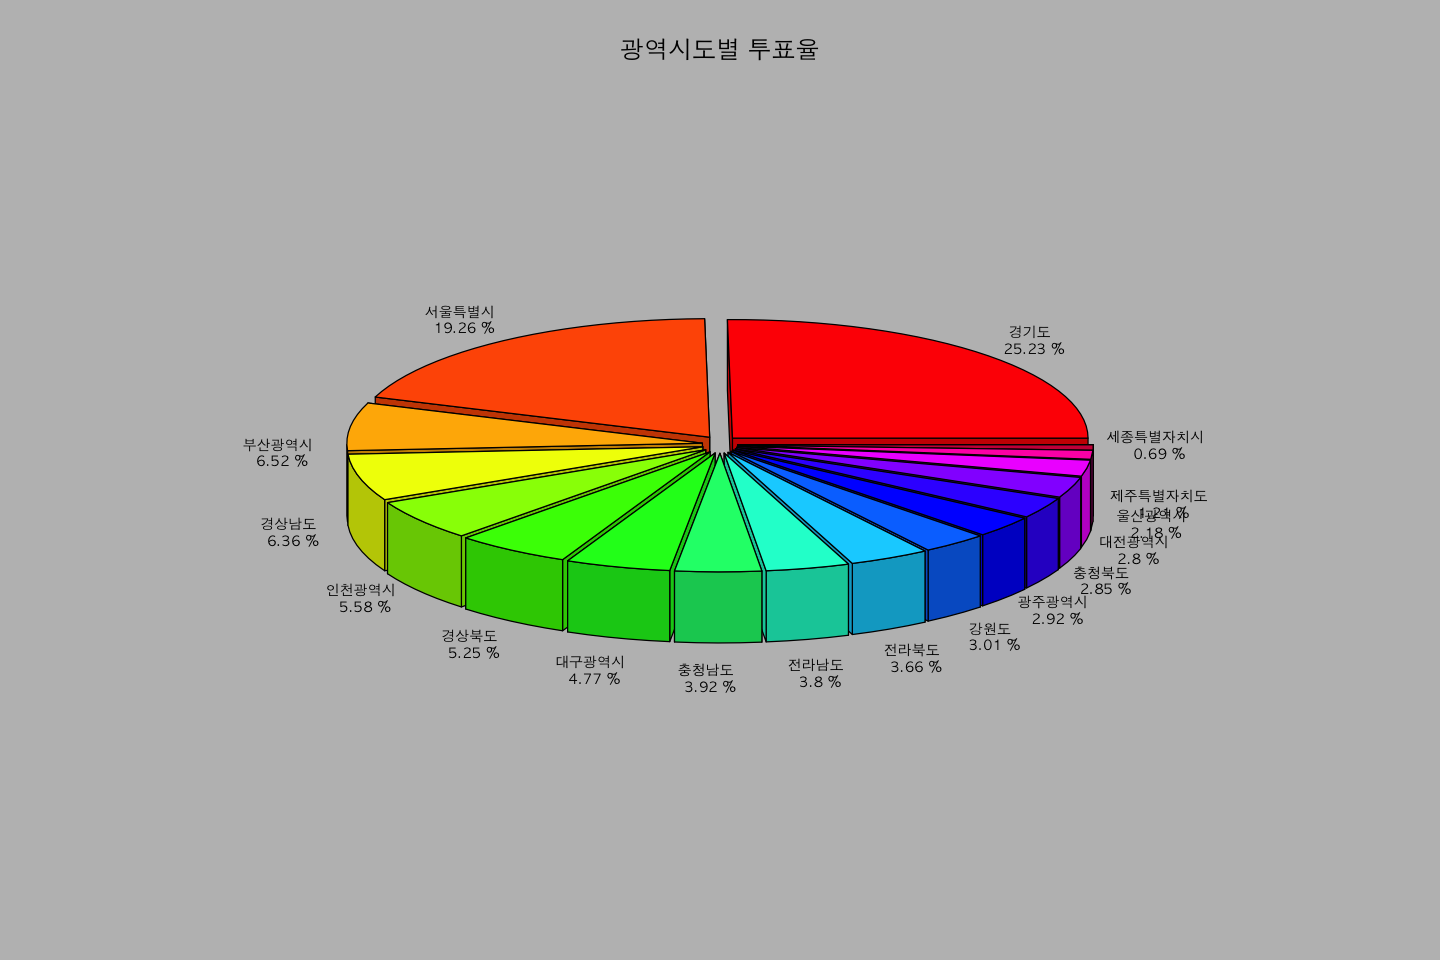

In [11]:

# 전체 투표수 
totalElectNum <- sum(election[,4]); totalElectNum


electRate.electNum<- aggregate(투표수~광역시도,election, sum)$투표수

electRate.percent<-round(electRate.electNum/totalElectNum*100,2)
electRate<- data.frame(광역시도 =aggregate(투표수~광역시도,election, sum)$광역시도,
                        투표율 = electRate.percent

);

electRate <- arrange(electRate, desc(투표율))
head(electRate)
par(bg ='grey', family= 'AppleGothic')
options(repr.plot.width=12, repr.plot.height=8) 


label <- paste(electRate$`광역시도`,"\n",electRate$`투표율`,"%")
pie3D(electRate$`투표율`,
    main ="광역시도별 투표율",
    col = rainbow(length(electRate$`투표율`)),
    labels = label,
    explode =0.05,
    labelcex =0.7

)






In [12]:
election$투표율 <- election$`투표수`/election$`선거인수`*100
# 전체 투표수 
#election[,4]
totalElectNum <- sum(election[,4]); totalElectNum

[1] 33764664

In [13]:
#1) 광역시별 합계 구하기 
elect_sum<- aggregate(투표수~광역시도,election,sum)
head(elect_sum)

,광역시도,투표수
,<chr>,<int>
1,강원도,1015458
2,경기도,8518854
3,경상남도,2146882
4,경상북도,1774284
5,광주광역시,985492
6,대구광역시,1611512


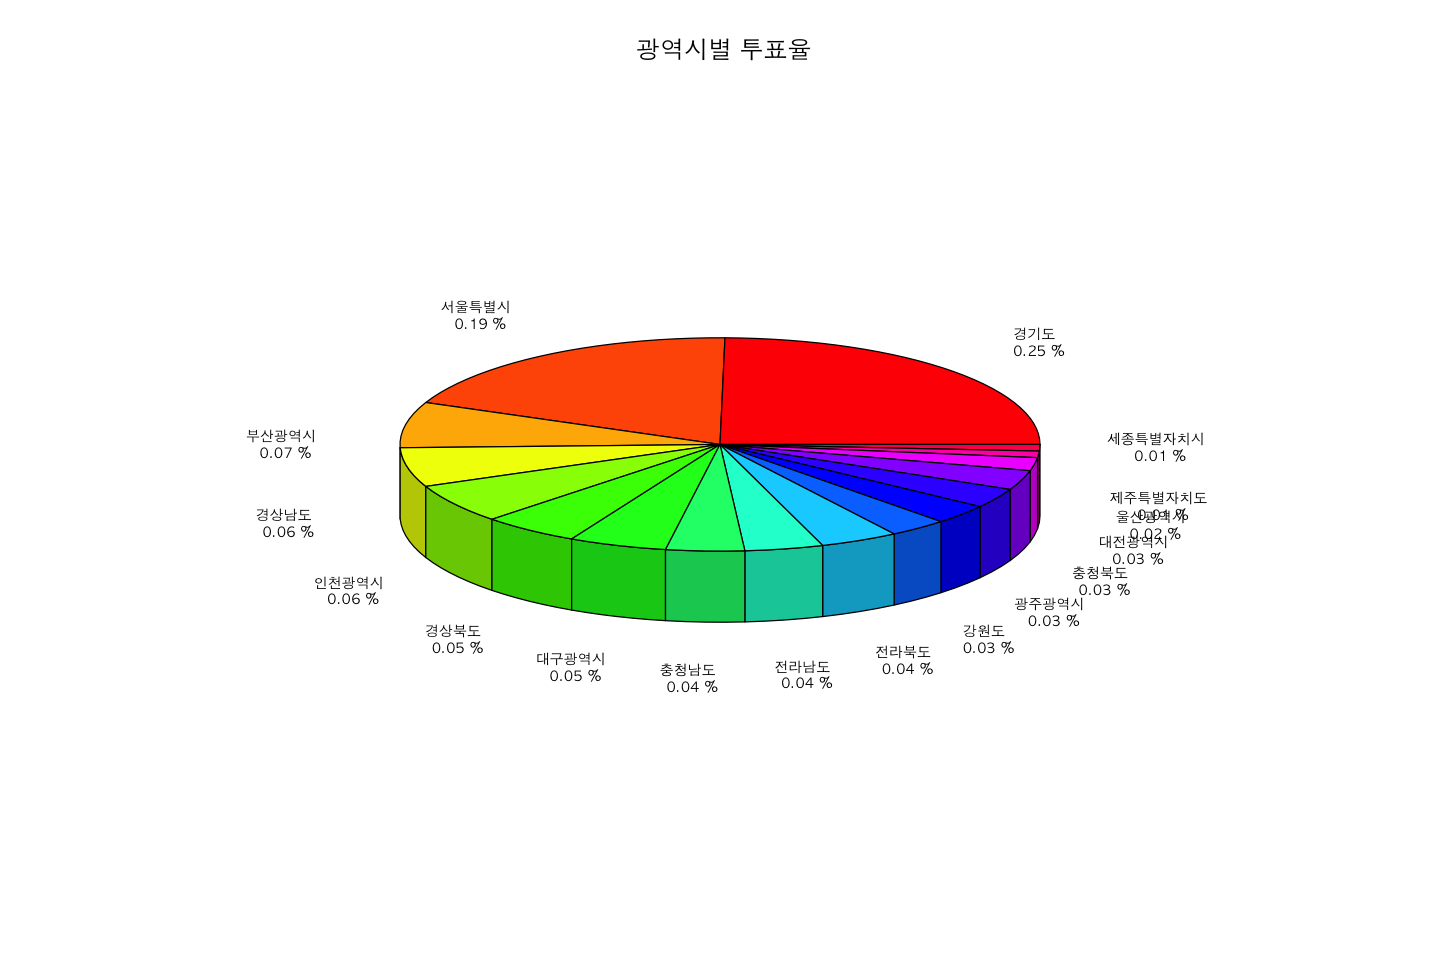

In [14]:
#2) 광역시별 합계 내림차순으로 정렬하기 
elect_sum_order <- arrange(elect_sum, desc(투표수))

# Ratio 구하기
e_ratio<- round(elect_sum_order$`투표수`/sum(elect_sum_order$`투표수`),2); #e_ratio

# label 만들기
label<-paste(elect_sum_order$`광역시도`,"\n",e_ratio,"%")

#3D Pie Chart 그리기
par(bg = 'white',family = "AppleGothic")
pie3D(e_ratio,
    radius = 0.9,
    main = " 광역시별 투표율",
    labels = label,
    labelcex =0.7
)


In [15]:
# 수도권(경기도, 서울, 인천)의 투표수에 대한 전체 투표수의 퍼센트?

sudo <-subset(elect_sum_order, 광역시도 == c("경기도","서울특별시","인천광역시") | 광역시도 == "인천광역시")

sudoPercent <-round(sum(sudo$투표수)/sum(elect_sum_order$`투표수`) *100,2)

sudoPercent


[1] 50.06

## 윤석열 후보의 광역시도별 득표율을 3D Pie Chart로 표현하기

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183,77.42598
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055,76.26696
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076,76.38652
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292,78.24283
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531,77.56422
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565,77.13008


[1] 23.7 20.0  7.9  7.8  7.6  7.4  5.4  4.1  3.4  3.0  2.9  2.4  1.1  1.1  0.9
[16]  0.8  0.6

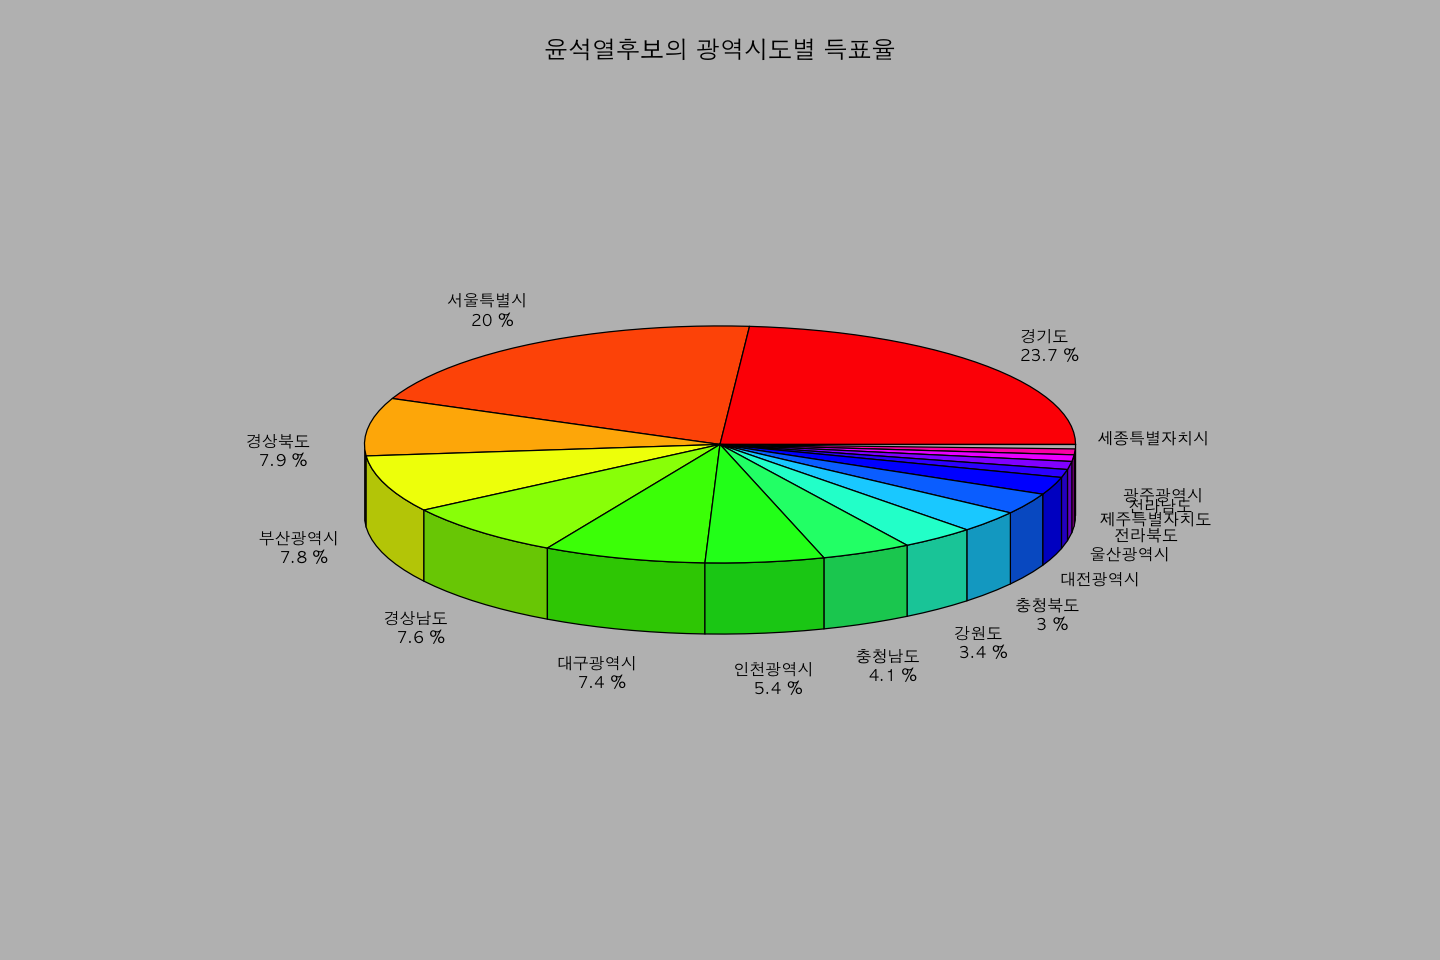

In [16]:

head(election)
yElect<-arrange(aggregate(윤석열~광역시도, election,sum),desc(윤석열))
yElectRate <-round(yElect$`윤석열`/sum(yElect$`윤석열`)*100,1); yElectRate

#label 
label <- ifelse( yElectRate>= 3,paste( yElect$`광역시도` ,"\n",yElectRate,"%" ),yElect$`광역시도`)
par(bg = 'grey', family = 'AppleGothic')
pie3D(yElectRate,
    labels = label,
    main ="윤석열후보의 광역시도별 득표율",
    labelcex =0.8
)

[1] 23.7 20.0  7.9  7.8  7.6  7.4  5.4  4.1  3.4  3.0  2.9  2.4  1.1  1.1  0.9
[16]  0.8  0.6

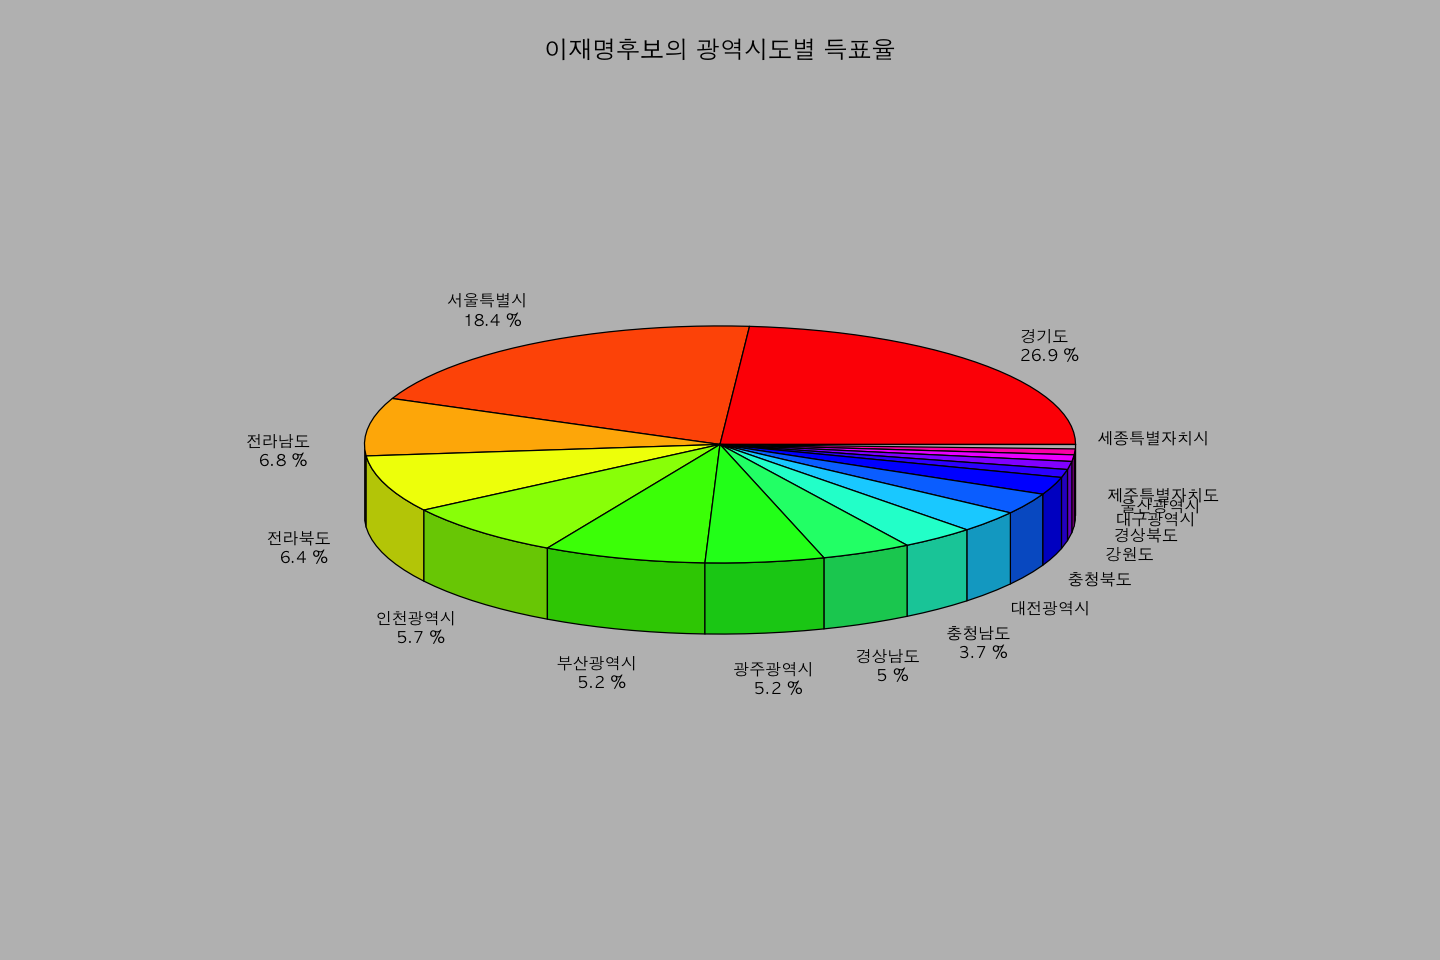

In [17]:

leeElect<-arrange(aggregate(이재명~광역시도, election,sum),desc(이재명))
leeElectRate <-round(leeElect$`이재명`/sum(leeElect$`이재명`)*100,1); yElectRate

#label 
label <- ifelse( leeElectRate>= 3,paste( leeElect$`광역시도` ,"\n",leeElectRate,"%" ),leeElect$`광역시도`)
par(bg = 'grey', family = 'AppleGothic')
pie3D(yElectRate,
    labels = label,
    main ="이재명후보의 광역시도별 득표율",
    labelcex =0.8
)


# 윤서열 후보의 서울 득표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기 


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630,80.15269
2,서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59180,78.49592
3,서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303,77.40155
4,서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61234,80.60135
5,서울특별시,노원구,441879,349297,169275,163340,10021,342636,98.09303,79.04811
6,서울특별시,강동구,397634,313203,139172,160593,8029,307794,98.27301,78.76665


[1] "송파구" "강남구" "강서구" "서초구" "노원구"

[1] 7.84 7.25 5.58 5.51 5.02

[1] "송파구 \n 7.84 %" "강남구 \n 7.25 %" "강서구 \n 5.58 %" "서초구 \n 5.51 %"
[5] "노원구 \n 5.02 %" "기타 68.81 %"

[1]  7.84  7.25  5.58  5.51  5.02 68.81

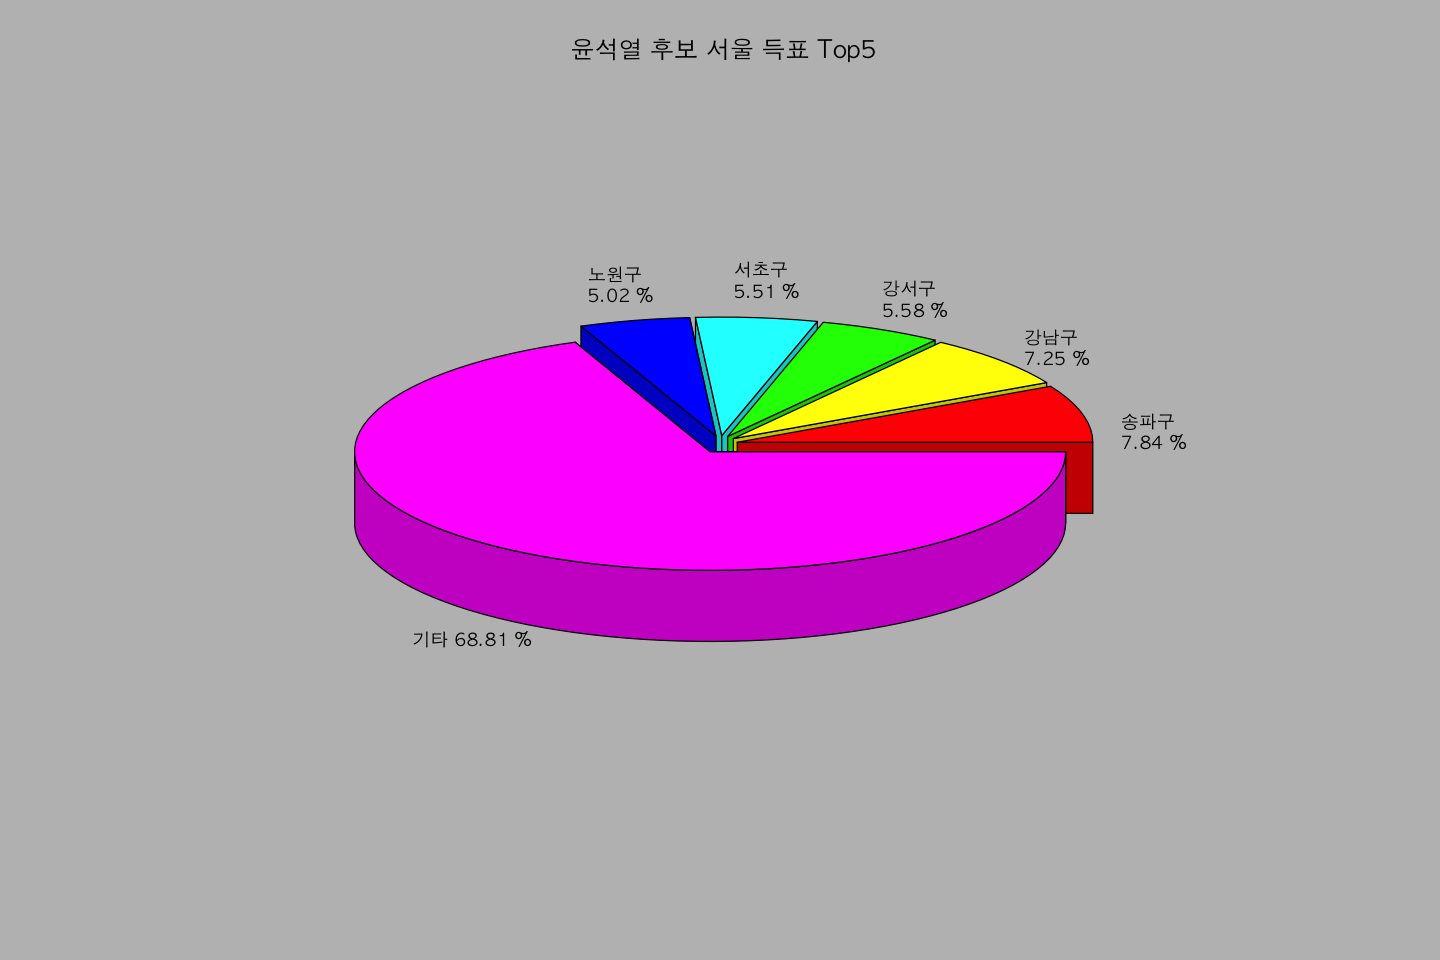

In [18]:
#head(election)
# 서울 만 
seoul<-arrange(subset(election, 광역시도 == '서울특별시'), desc(윤석열))

head(seoul)
# 윤석열 후보의 득표 율 계산 


ySeoulRate <-round(seoul$`윤석열`/sum(seoul$`윤석열`)*100,2)
ySeoulRate_top5 <- c(ySeoulRate[1:5],sum(ySeoulRate[6:length(ySeoulRate)]))
seoul$`시군구`[1:5]
ySeoulRate_top5[1:5]
#label 
label <- c(
    paste(seoul$`시군구`[1:5],"\n", ySeoulRate_top5[1:5],"%"),
            
            paste("기타",ySeoulRate_top5[6],"%")
    )
label
ySeoulRate_top5

par(bg ='grey',family = "AppleGothic")
pie3D(ySeoulRate_top5,

    main =" 윤석열 후보 서울 득표 Top5",
    labels =label,
    explode =0.05,
    labelcex =0.89

)




[1] 17

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
대구광역시,달서구,466792,368662,77951,275155,7361,360467,97.77710,78.97779
경기도,화성시,703896,542027,283324,236055,12955,532334,98.21171,77.00385
경기도,부천시,699678,532995,285227,224331,13249,522807,98.08854,76.17718
대구광역시,수성구,349945,285537,59379,216031,5168,280578,98.26327,81.59482
대구광역시,북구,373173,294832,66469,215861,6090,288420,97.82520,79.00679
경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22483,75.72491
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751,82.92702
경상북도,구미시,338810,253211,67054,173950,5537,246541,97.36583,74.73540
대구광역시,동구,297312,232992,52170,171004,4522,227696,97.72696,78.36616


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,대구광역시,달서구,466792,368662,77951,275155,7361,360467,97.77710,78.97779
2,경기도,화성시,703896,542027,283324,236055,12955,532334,98.21171,77.00385
3,경기도,부천시,699678,532995,285227,224331,13249,522807,98.08854,76.17718
4,대구광역시,수성구,349945,285537,59379,216031,5168,280578,98.26327,81.59482
5,대구광역시,북구,373173,294832,66469,215861,6090,288420,97.82520,79.00679
6,경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22483,75.72491


[1] "대구광역시" "경기도"     "경기도"     "대구광역시" "대구광역시"

[1] 2.12 1.82 1.73 1.66 1.66

[1] "대구광역시 \n 2.12 %" "경기도 \n 1.82 %"     "경기도 \n 1.73 %"    
[4] "대구광역시 \n 1.66 %" "대구광역시 \n 1.66 %" "기타 91.01 %"

[1]  2.12  1.82  1.73  1.66  1.66 91.01

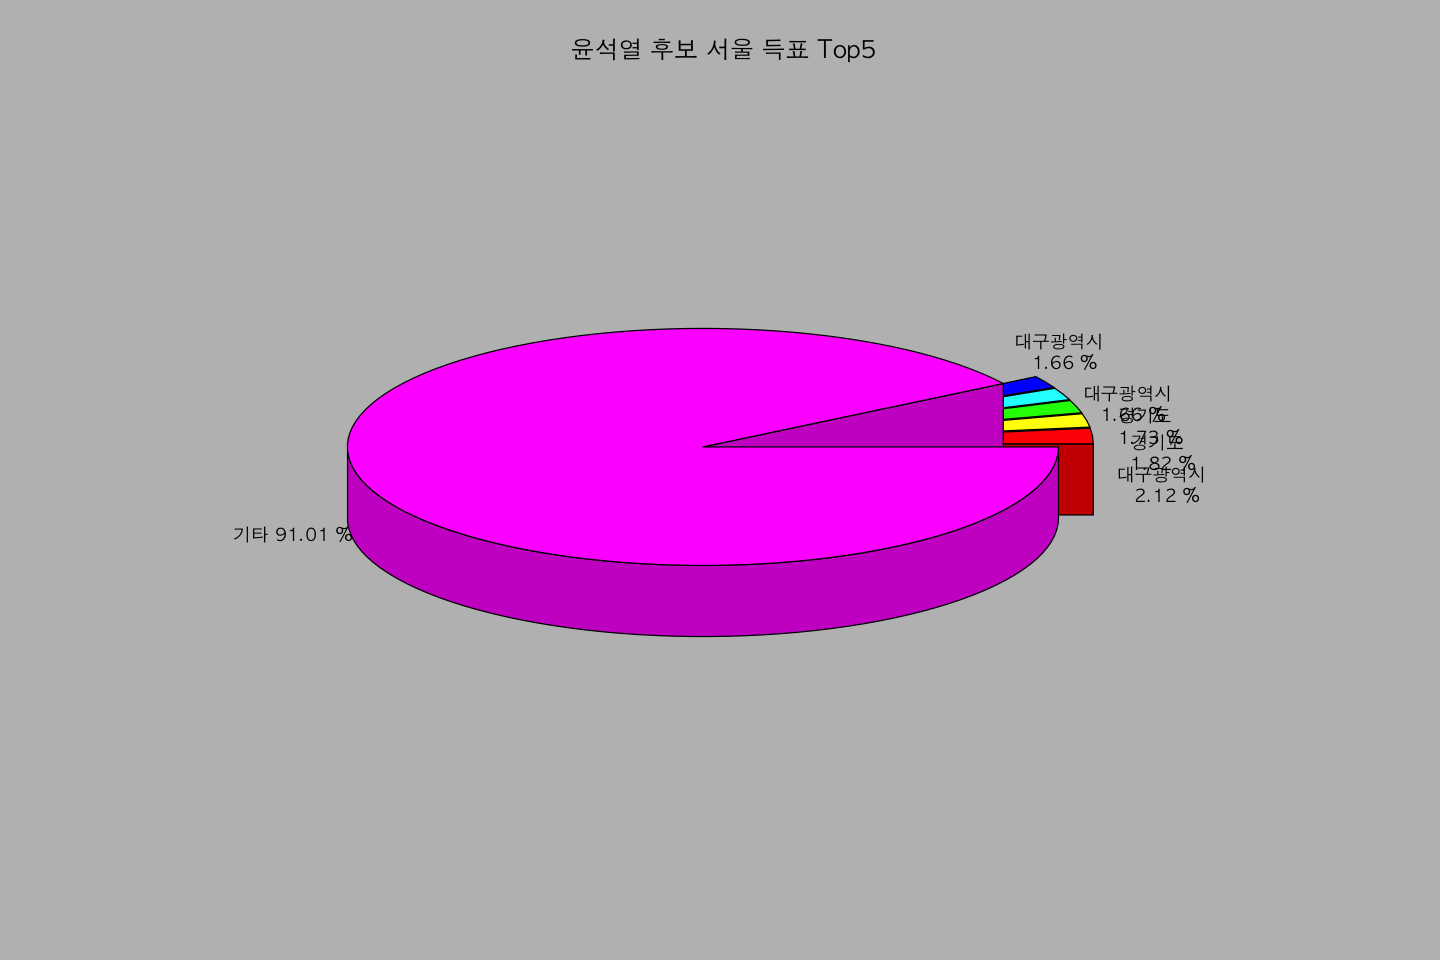

In [19]:
length(unique(election$`광역시도`))

#head(election)
# 서울 만 
extRegion<-arrange(subset(election, 광역시도 != '서울특별시'), desc(윤석열))

#광역시도별 데이터로 그룹화
extRegion
head(extRegion)
# 윤석열 후보의 득표 율 계산 


yExRate <-round(extRegion$`윤석열`/sum(extRegion$`윤석열`)*100,2)
yExRate_top5 <- c(yExRate[1:5],sum(yExRate[6:length(yExRate)]))
extRegion$`광역시도`[1:5]
yExRate_top5[1:5]
#label 
label <- c(
    paste(extRegion$`광역시도`[1:5],"\n", yExRate_top5[1:5],"%"),
            paste("기타",yExRate_top5[6],"%")
    )
label
yExRate_top5

par(bg ='grey',family = "AppleGothic")
pie3D(yExRate_top5,
    main =" 윤석열 후보 서울 득표 Top5",
    labels =label,
    explode =0.05,
    labelcex =0.89
)



In [20]:
# 선생님버전
# 서울시 데이터만 발췌하기
# subset (election, 광역시도 =='서울특별시')
election_seoul <- election[election$광역시도 =="서울특별시",]
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
election_seoul_윤석열_ratio<-round(c(election_seoul_윤석열[1:5,2], sum(election_seoul_윤석열[-c(1:5),2]))/ sum(election_seoul_윤석열[,2])*100,1)
election_seoul_윤석열_ratio


[1]  7.8  7.2  5.6  5.5  5.0 68.8

## 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구


,이재명,윤석열,심상정,기타
,<dbl>,<dbl>,<dbl>,<dbl>
8,48.84,46.22,3.06,1.88


[1] "이재명 \n 48.84 %" "윤석열 \n 46.22 %" "심상정 \n 3.06 %" 
[4] "기타 \n 1.88 %"

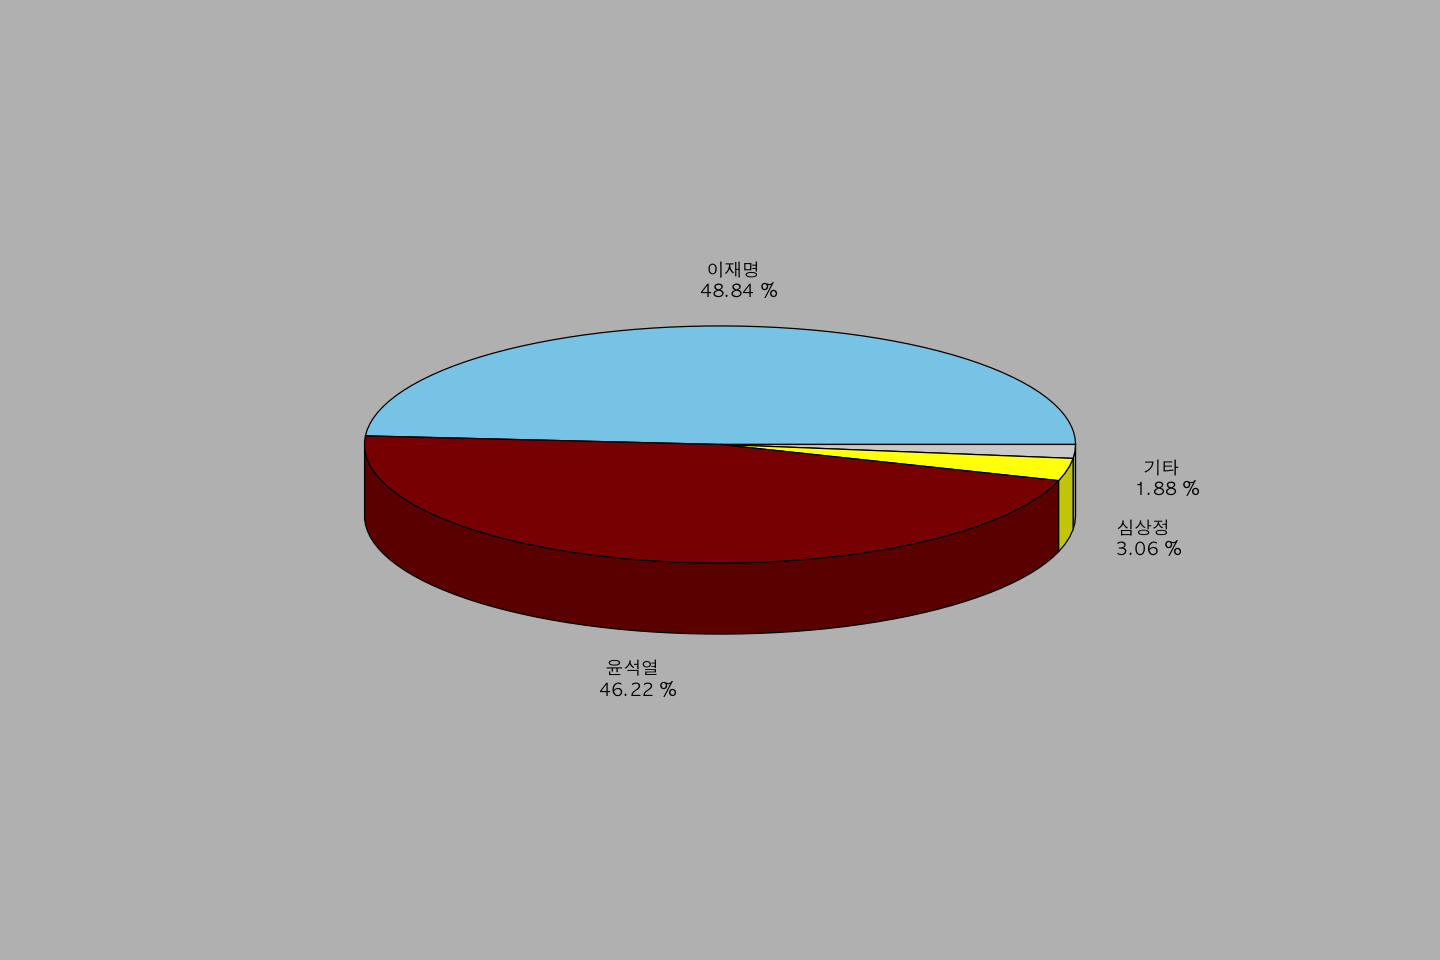

In [21]:
#election[election$시군구 == "성북구"]
e_SB<-subset(election,시군구 =="성북구")

e_rate_SungBuk <- round(e_SB[5:7]/e_SB$투표수*100,2)
e_rate_SungBukEtc <- round(100-sum(e_SB[5:7]/e_SB$투표수*100),2)
e_rate_SungBuk$기타 <-e_rate_SungBukEtc
e_rate_SungBuk

label =c(
    paste(colnames(e_rate_SungBuk),"\n", e_rate_SungBuk,"%")
)
label
par(bg ='grey',family = 'applegothic')
pie3D(t(e_rate_SungBuk),

    col= c("skyblue","darkred","yellow","lightgrey" ),
    labels =label,
    labelcex =0.89
)

In [22]:
# 선생님 버전.
pob_yoon <- subset(election, 시군구 =="성북구")
pob_yoon

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141,77.73412


In [23]:
# Ratio 구하기




# 기타는 계속 나온다. 
- 현황분석. 혹은 가설을 검증하는것이 분석이다. 마음대로 하면된다. 분석은 마음대로 하면된다. 

### 투표수가 가장 많은 4지역 (광역시도)의 각 후보별 득표수를 막대그래프로 그리기 


,광역시도,투표수
,<chr>,<int>
1,경기도,8518854
2,서울특별시,6501831
3,부산광역시,2200224
4,경상남도,2146882


,광역시도,이재명
,<chr>,<int>
1,경기도,4297931
2,서울특별시,2944981
3,전라남도,1094872
4,전라북도,1016863


,광역시도,투표수,이재명,윤석열,심상정
,<chr>,<int>,<int>,<int>,<int>
1,경기도,8518854,4297931,3859666,201113
2,서울특별시,6501831,2944981,3255747,180324
3,부산광역시,2200224,1094872,1278922,52591
4,경상남도,2146882,1016863,1270072,51852


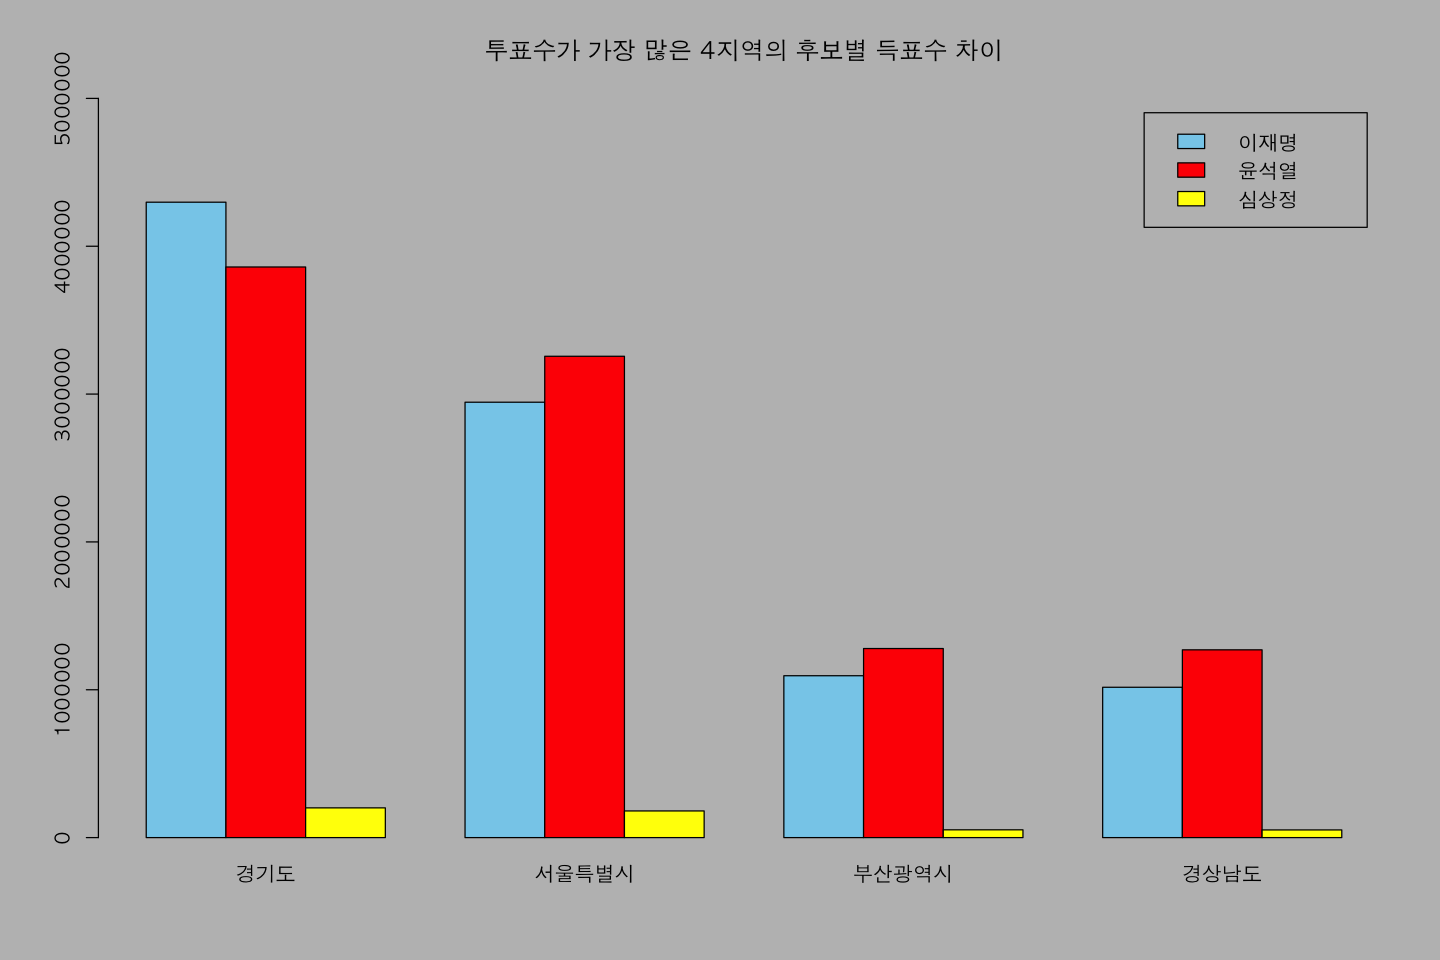

In [108]:
#head(election)
# 광역시도 별 투표수 
election_top4<-arrange(aggregate(투표수~광역시도,election, sum), desc(투표수))[1:4,]; election_top4
이재명_top4<-arrange(aggregate(이재명~광역시도,election, sum), desc(이재명))[1:4,]
윤석열_top4<-arrange(aggregate(윤석열~광역시도,election, sum), desc(윤석열))[1:4,]
심상정_top4<-arrange(aggregate(심상정~광역시도,election, sum), desc(심상정))[1:4,]

head(이재명_top4)
election_top4$이재명 <-이재명_top4$이재명
election_top4$윤석열 <-윤석열_top4$윤석열
election_top4$심상정 <-심상정_top4$심상정

par(bg ='grey', family = "applegothic")
election_top4<-election_top4[,-2] # 투표수 칼럼 제거
rownames(election_top4)<- election_top4$`광역시도`
election_top4<-election_top4[,-1]
election_top4<-t(election_top4)
options(scipen =100)
barplot(election_top4,
        beside =T,
        col = c("skyblue","red","yellow"),
        ylim =c(0,5000000),
        legend.text =T,
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이"
        
        )



In [91]:
## 선생님 버전 
# 투표수가 가장많은 4지역 구하기
top4Area<- arrange((elect_sum), desc(투표수))[1:4,1]

# 광역시별 후보 득표수 합계 구하기 
elec_윤석열 <- aggregate(윤석열 ~ 광역시도 , election, sum ) ; 
elec_이재명 <- aggregate(이재명 ~ 광역시도 , election, sum ) ; 
elec_심상정 <- aggregate(심상정 ~ 광역시도 , election, sum ) ; 


In [96]:
# 투표수가 1 순위인 지역의 득표수 구하기 
top4_1 <-c(
subset(elec_윤석열, 광역시도 == top4Area[1])[1,2],
subset(elec_이재명, 광역시도 == top4Area[1])[1,2],
subset(elec_심상정, 광역시도 == top4Area[1])[1,2])
top4_1

[1] 3859666 4297931  201113

In [98]:
# 투표수가 3 순위인 지역의 득표수 구하기 
top4_2 <-c(
subset(elec_윤석열, 광역시도 == top4Area[2])[1,2],
subset(elec_이재명, 광역시도 == top4Area[2])[1,2],
subset(elec_심상정, 광역시도 == top4Area[2])[1,2])
top4_2

[1] 3255747 2944981  180324

In [100]:
# 투표수가 3 순위인 지역의 득표수 구하기 
top4_3 <-c(
subset(elec_윤석열, 광역시도 == top4Area[3])[1,2],
subset(elec_이재명, 광역시도 == top4Area[3])[1,2],
subset(elec_심상정, 광역시도 == top4Area[3])[1,2])
top4_3

[1] 1270072  831896   47541

In [102]:
# 투표수가 4 순위인 지역의 득표수 구하기 
top4_4 <-c(
subset(elec_윤석열, 광역시도 == top4Area[4])[1,2],
subset(elec_이재명, 광역시도 == top4Area[4])[1,2],
subset(elec_심상정, 광역시도 == top4Area[4])[1,2])
top4_4

[1] 1237346  794130   52591

In [107]:

top4<- cbind(top4_1,top4_2,top4_3,top4_4)
colnames(top4)<- top4Area
rownames(top4)<- c("윤석열","이재명","심상정")
top4

,경기도,서울특별시,부산광역시,경상남도
윤석열,3859666,3255747,1270072,1237346
이재명,4297931,2944981,831896,794130
심상정,201113,180324,47541,52591


In [110]:
# 위의 내용을 반복문을 통해 계산
for( i in 1:length(top4Area)){
    topTemp <- c(subset(elec))
}

ERROR: Error in eval(expr, envir, enclos): 객체 'elec'를 찾을 수 없습니다


In [119]:
# aggregate 를 사용하지 않고 계산 
head(election)
class(apply(subset(election, 광역시도 ==top4Area[1])[,5:7],2,sum))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183,77.42598
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055,76.26696
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076,76.38652
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292,78.24283
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531,77.56422
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565,77.13008


[1] "integer"

In [121]:
top4 <- c()
for(i in 1:length(top4Area)){
    topTemp <- apply(subset(election, 광역시도 ==top4Area[i])[,5:7],2,sum)
    top4<- cbind(top4,topTemp)
}
colnames(top4)<- top4Area
top4

,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [122]:
class(top4)

[1] "matrix" "array"

### 투표수가 높은 시군구 후보별 득표수

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,경기도,화성시,703896,542027,283324,236055,12955,532334,98.21171,77.00385
2,경기도,부천시,699678,532995,285227,224331,13249,522807,98.08854,76.17718
3,경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22483,75.72491
4,서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630,80.15269
5,서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303,77.40155


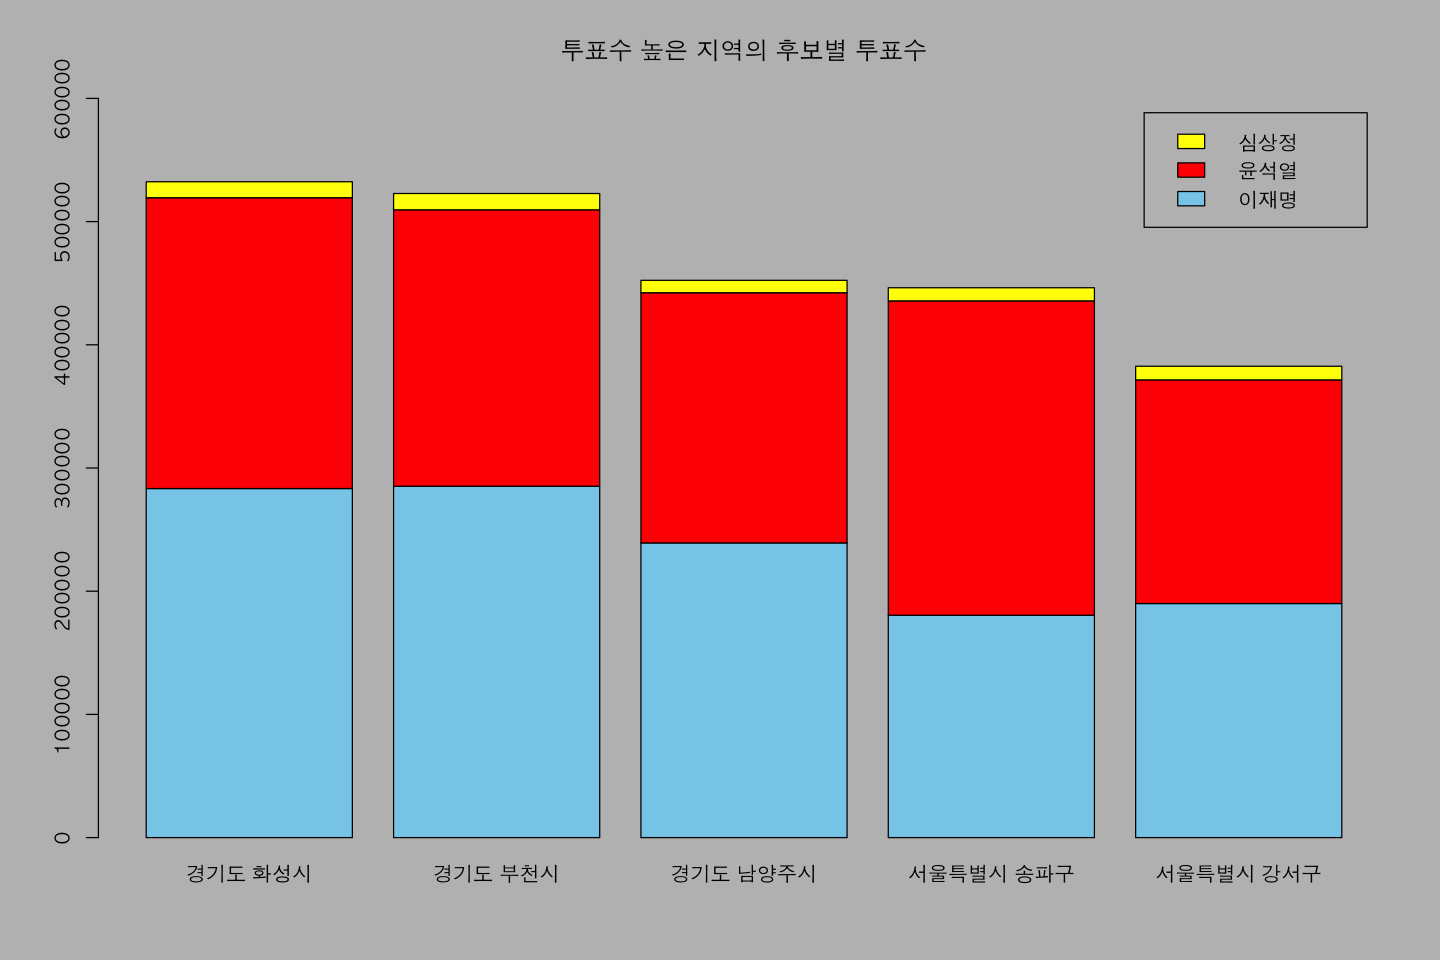

In [153]:
#head(election)
elect_top5Area<-arrange(election,desc(투표수))[1:5,];elect_top5Area

#top5 선거구 이름
elect_top5Area_name<-paste(elect_top5Area[,1],elect_top5Area[,2])

rownames(elect_top5Area)<-elect_top5Area_name
par(family = "applegothic", bg="grey")
barplot(t(elect_top5Area[,5:7]),
    col= c("sky blue", "red", "yellow"),
    legend.text = T,
    main = "투표수 높은 지역의 후보별 투표수",
    ylim = c(0,600000)

)

In [162]:
# 선생님 버전
elec_top5_matrix<-t(head(arrange(election, desc(투표수)),5)[,5:7])
elec_top5_matrix

,1,2,3,4,5
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


In [168]:
e5<-head(arrange(election, desc(투표수)),5)[1:2]
colnames(elec_top5_matrix) <- paste(e5[,1],e5[,2])
elec_top5_matrix

,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100
